## Load Libraries

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing libraries
from sklearn.preprocessing import StandardScaler

# modeling 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# optimization
import optuna
from sklearn.metrics import silhouette_score
# evaluation metrics
from sklearn.metrics import silhouette_score

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
cluster_data = pd.read_csv('cluster 2.csv')

## Explatory Data Analaysis

In [3]:
cluster_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cluster_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cluster_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
cluster_data.duplicated().sum()

0

<Axes: >

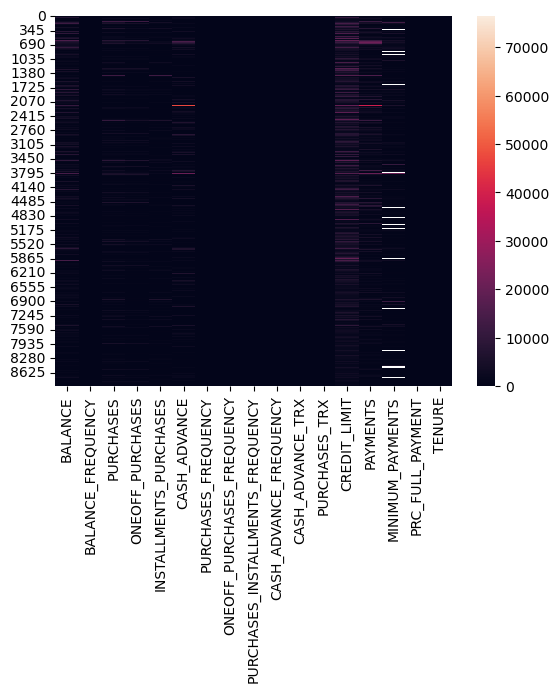

In [8]:
numerical_data = cluster_data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data)

## Cleaning

In [9]:
cluster_data = pd.read_csv('cluster 2.csv')
# Drop rows with NaN in 'CUST_ID'
cluster_data = cluster_data.dropna(subset=['CUST_ID'])

# Drop rows with NaN in any column and remove duplicates
cluster_data_cleaned = cluster_data.dropna().drop_duplicates()

# Extract 'CUST_ID' column
cust_id_column = cluster_data_cleaned['CUST_ID']

# Exclude 'CUST_ID' column from scaling
numerical_data = cluster_data_cleaned.drop(columns=['CUST_ID'])

## Standardizing the features

In [10]:
# Scale numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Combine scaled numerical data with 'CUST_ID' column
scaled_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)
scaled_data['CUST_ID'] = cust_id_column.values

# Exclude non-numeric columns from scaled_df
numeric_columns = scaled_data.select_dtypes(include=['number']).columns
numeric_df = scaled_data[numeric_columns]

## K-Means Clustering

In [11]:
# Default K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_df)

# Adding cluster labels to the DataFrame
cluster_data_cleaned['KMeans_Labels'] = kmeans_labels

## Plotting Elbow Method for optimal number of clusters

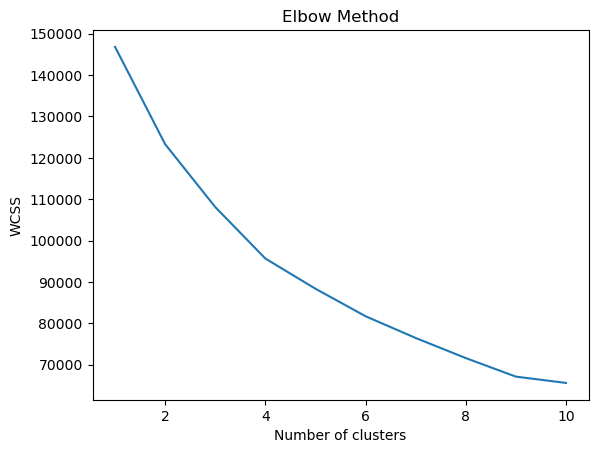

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(numeric_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Perform PCA to reduce dimensions to 2D for visualization

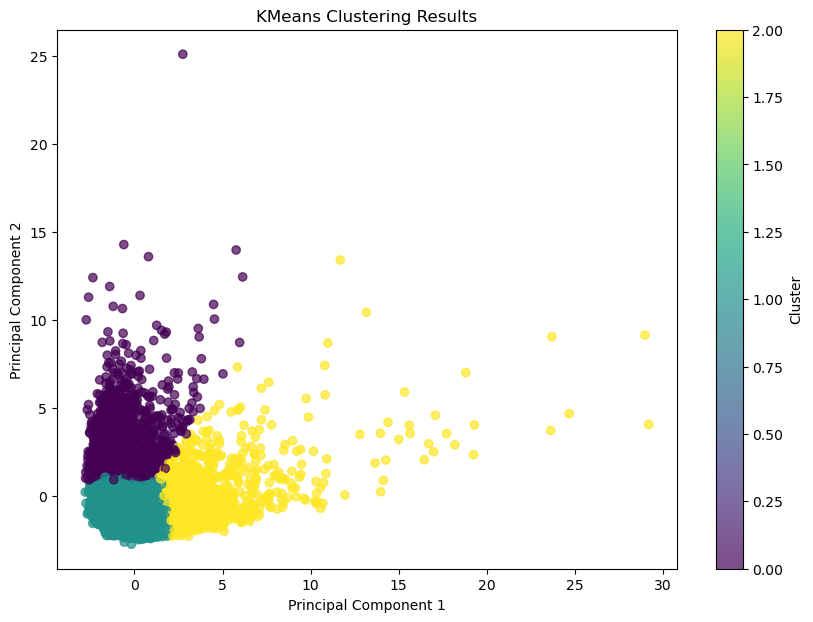

In [13]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_df)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


## Agglomerative Clustering

In [14]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(numeric_df)
# Adding cluster labels to the DataFrame
cluster_data_cleaned['Agg_Labels'] = agg_labels

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_df)

## Create a DataFrame with the PCA components

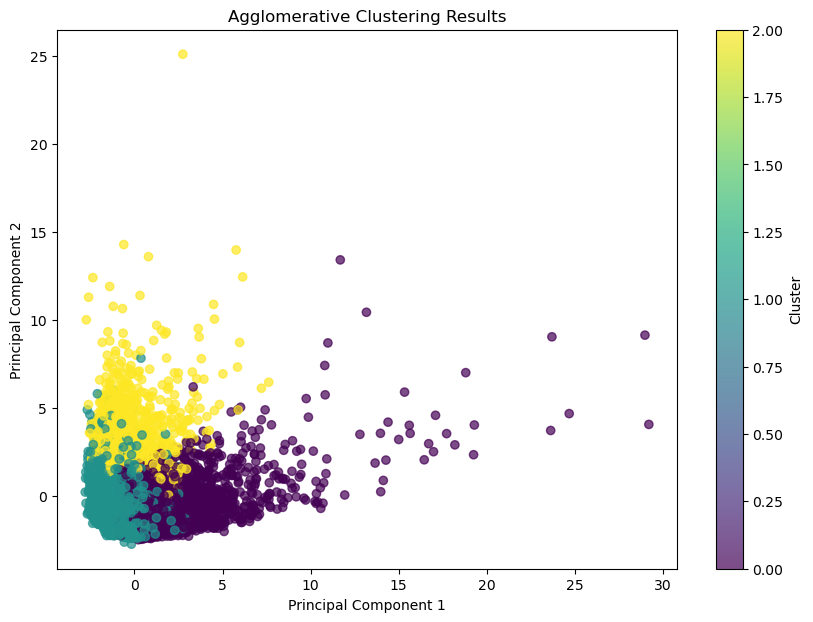

In [15]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = agg_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

## Optimization with Optuna

## Optimize K-Means


In [16]:
def optimize_kmeans(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(numeric_df)
    return silhouette_score(numeric_df, kmeans_labels)

kmeans_study = optuna.create_study(direction='maximize')
kmeans_study.optimize(optimize_kmeans, n_trials=20)
best_kmeans_clusters = kmeans_study.best_params['n_clusters']
print(f"Best number of clusters for K-Means: {best_kmeans_clusters}")

[I 2024-05-21 16:21:33,003] A new study created in memory with name: no-name-79b4c975-5b58-4d4f-9fb6-c85efeaf5eb4
[I 2024-05-21 16:21:35,272] Trial 0 finished with value: 0.23193868740057688 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.23193868740057688.
[I 2024-05-21 16:21:37,244] Trial 1 finished with value: 0.24709726016009056 and parameters: {'n_clusters': 3}. Best is trial 1 with value: 0.24709726016009056.
[I 2024-05-21 16:21:39,405] Trial 2 finished with value: 0.23193868740057688 and parameters: {'n_clusters': 9}. Best is trial 1 with value: 0.24709726016009056.
[I 2024-05-21 16:21:41,433] Trial 3 finished with value: 0.21420697552058446 and parameters: {'n_clusters': 10}. Best is trial 1 with value: 0.24709726016009056.
[I 2024-05-21 16:21:43,530] Trial 4 finished with value: 0.2202696764982146 and parameters: {'n_clusters': 7}. Best is trial 1 with value: 0.24709726016009056.
[I 2024-05-21 16:21:45,666] Trial 5 finished with value: 0.22714277002964117 and 

Best number of clusters for K-Means: 3


## Optimize Agglomerative Clustering

In [ ]:
def optimize_agg(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(numeric_df)
    return silhouette_score(numeric_df, agg_labels)

agg_study = optuna.create_study(direction='maximize')
agg_study.optimize(optimize_agg, n_trials=20)
best_agg_clusters = agg_study.best_params['n_clusters']
print(f"Best number of clusters for Agglomerative Clustering: {best_agg_clusters}")

[I 2024-05-21 16:22:16,948] A new study created in memory with name: no-name-f9d257ef-884d-4ba0-93d1-c2051babc0f6
[I 2024-05-21 16:22:24,177] Trial 0 finished with value: 0.16709194070846045 and parameters: {'n_clusters': 7}. Best is trial 0 with value: 0.16709194070846045.
[I 2024-05-21 16:22:30,759] Trial 1 finished with value: 0.17845266791386857 and parameters: {'n_clusters': 3}. Best is trial 1 with value: 0.17845266791386857.
[I 2024-05-21 16:22:37,816] Trial 2 finished with value: 0.1770535189599759 and parameters: {'n_clusters': 8}. Best is trial 1 with value: 0.17845266791386857.
[I 2024-05-21 16:22:45,236] Trial 3 finished with value: 0.18316897479835914 and parameters: {'n_clusters': 6}. Best is trial 3 with value: 0.18316897479835914.
[I 2024-05-21 16:22:53,720] Trial 4 finished with value: 0.1865256797594413 and parameters: {'n_clusters': 10}. Best is trial 4 with value: 0.1865256797594413.
[I 2024-05-21 16:23:02,882] Trial 5 finished with value: 0.17958078141889866 and pa

## Plotting the optimized clusters

In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Fit and plot K-Means with optimized number of clusters

In [ ]:
kmeans = KMeans(n_clusters=best_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_df)
plot_clusters(numeric_df.values, kmeans_labels, 'K-Means Clustering')

## Fit and plot Agglomerative Clustering with optimized number of clusters

In [ ]:
agg = AgglomerativeClustering(n_clusters=best_agg_clusters)
agg_labels = agg.fit_predict(numeric_df)
plot_clusters(numeric_df.values, agg_labels, 'Agglomerative Clustering')

## Evaluation and Results Compilation

In [ ]:
results = pd.DataFrame({
    'Model': ['K-Means', 'Agglomerative'],
    'Default Silhouette Score': [
        silhouette_score(numeric_df, kmeans_labels),
        silhouette_score(numeric_df, agg_labels)
    ],
    'Optimized Silhouette Score': [
        kmeans_study.best_value,
        agg_study.best_value
    ]
})
results

## Univariate Analysis of Best Model

In [ ]:
best_n_clusters = kmeans_study.best_params['n_clusters']
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
best_kmeans_labels = best_kmeans.fit_predict(numeric_df)
cluster_data_cleaned['Best_KMeans_Labels'] = best_kmeans_labels

## Univariate analysis example

In [ ]:
sns.pairplot(cluster_data_cleaned, hue='Best_KMeans_Labels')
plt.show()